In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [4]:
df = pd.read_csv("/kaggle/input/understanding_cloud_organization/train.csv")
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [5]:
df[['Image_Name', 'Label']] = df['Image_Label'].str.split("_", expand=True)
df.drop(['Image_Label'], axis = 1, inplace = True)

In [6]:
df.head()

,EncodedPixels,Image_Name,Label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,NaN,0011165.jpg,Gravel
3,NaN,0011165.jpg,Sugar
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [7]:
df.isnull().sum()

EncodedPixels    10348
Image_Name           0
Label                0
dtype: int64

In [32]:
df.dropna(inplace = True)
df.head()

,EncodedPixels,Image_Name,Label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
5,1339279 519 1340679 519 1342079 519 1343479 51...,002be4f.jpg,Flower
7,67495 350 68895 350 70295 350 71695 350 73095 ...,002be4f.jpg,Sugar


In [27]:
def decode_rle(mask_rle,shape = (1400, 2100)):
    """decoding mask string"""
    s = mask_rle.split()
    
    starts , lengths = [np.asarray(x, dtype = int) for x in (s[0::2],s[1::2])]
    starts -= 1
    ends = starts + lengths
    tmp_img = np.zeros(shape[0]*shape[1], dtype = np.uint8)
    for lo, hi in zip(starts, ends):
        tmp_img[lo:hi] = 1
        
    return tmp_img.reshape(shape, order ="F")

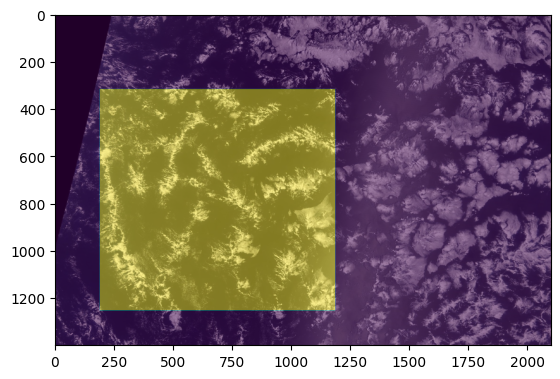

In [29]:
path = "/kaggle/input/understanding_cloud_organization/train_images"

for row in df.index[:5]:
    name = df['Image_Name'][row]
    img = cv2.cvtColor(cv2.imread(f"{path}/{name}"), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    mask_rle = df['EncodedPixels'][row]
    mask = decode_rle(mask_rle)
    plt.imshow(mask, alpha = 0.5)
    break